In [1]:
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained("cl-tohoku/bert-base-japanese")
model = BertModel.from_pretrained("cl-tohoku/bert-base-japanese")


print(model.config)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/258k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BertJapaneseTokenizer'. 
The class this function is called from is 'BertTokenizer'.


pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

BertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "cl-tohoku/bert-base-japanese",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "tokenizer_class": "BertJapaneseTokenizer",
  "transformers_version": "4.46.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 32000
}



In [2]:
import json


with open("output-train.json", "r", encoding="utf-8") as file:
    data_train = json.load(file)


print(f"nums: {len(data_train)}")
print(f"firstdata: {data_train[0]}")

with open("output-val.json", "r", encoding="utf-8") as file:
    data_val = json.load(file)


print(f"nums: {len(data_val)}")
print(f"firstdata: {data_val[0]}")


with open("output-test.json", "r", encoding="utf-8") as file:
    data_test = json.load(file)


print(f"nums: {len(data_test)}")
print(f"firstdata: {data_test[0]}")


nums: 7481
firstdata: {'sentence': 'ホッケーにはデンジャラスプレーの反則があるので、膝より上にボールを浮かすことは基本的に反則になるが、その例外の一つがこのスクープである。', 'tokens': [{'word': 'ホッケー', 'pos': '名詞'}, {'word': 'に', 'pos': '助詞'}, {'word': 'は', 'pos': '助詞'}, {'word': 'デンジャラス', 'pos': '名詞'}, {'word': 'プレー', 'pos': '名詞'}, {'word': 'の', 'pos': '助詞'}, {'word': '反則', 'pos': '名詞'}, {'word': 'が', 'pos': '助詞'}, {'word': 'ある', 'pos': '動詞'}, {'word': 'の', 'pos': '助詞'}, {'word': 'で', 'pos': '助動詞'}, {'word': '、', 'pos': '補助記号'}, {'word': '膝', 'pos': '名詞'}, {'word': 'より', 'pos': '助詞'}, {'word': '上', 'pos': '名詞'}, {'word': 'に', 'pos': '助詞'}, {'word': 'ボール', 'pos': '名詞'}, {'word': 'を', 'pos': '助詞'}, {'word': '浮かす', 'pos': '動詞'}, {'word': 'こと', 'pos': '名詞'}, {'word': 'は', 'pos': '助詞'}, {'word': '基本', 'pos': '名詞'}, {'word': '的', 'pos': '接尾辞'}, {'word': 'に', 'pos': '助動詞'}, {'word': '反則', 'pos': '名詞'}, {'word': 'に', 'pos': '助詞'}, {'word': 'なる', 'pos': '動詞'}, {'word': 'が', 'pos': '助詞'}, {'word': '、', 'pos': '補助記号'}, {'word': 'その', 'pos': '連体詞'}, {'word': '例外

In [3]:

def preprocess_data(data):
    sentences = []
    token_labels = []

    for item in data:
        sentence = item["sentence"]
        tokens = [token["word"] for token in item["tokens"]]
        pos_tags = [token["pos"] for token in item["tokens"]]

        sentences.append(sentence)
        token_labels.append((tokens, pos_tags))

    return sentences, token_labels


sentences_train, token_labels_train = preprocess_data(data_train)
sentences_val, token_labels_val = preprocess_data(data_val)
sentences_test, token_labels_test = preprocess_data(data_test)

print(f"sentence: {sentences_train[0]}")
print(f"pos: {token_labels_train[0]}")


sentence: ホッケーにはデンジャラスプレーの反則があるので、膝より上にボールを浮かすことは基本的に反則になるが、その例外の一つがこのスクープである。
pos: (['ホッケー', 'に', 'は', 'デンジャラス', 'プレー', 'の', '反則', 'が', 'ある', 'の', 'で', '、', '膝', 'より', '上', 'に', 'ボール', 'を', '浮かす', 'こと', 'は', '基本', '的', 'に', '反則', 'に', 'なる', 'が', '、', 'その', '例外', 'の', '一', 'つ', 'が', 'この', 'スクープ', 'で', 'ある', '。'], ['名詞', '助詞', '助詞', '名詞', '名詞', '助詞', '名詞', '助詞', '動詞', '助詞', '助動詞', '補助記号', '名詞', '助詞', '名詞', '助詞', '名詞', '助詞', '動詞', '名詞', '助詞', '名詞', '接尾辞', '助動詞', '名詞', '助詞', '動詞', '助詞', '補助記号', '連体詞', '名詞', '助詞', '名詞', '接尾辞', '助詞', '連体詞', '名詞', '助動詞', '動詞', '補助記号'])


In [4]:
def generate_label_to_id(data):
    label_set = set()
    for item in data:
        for token in item["tokens"]:
            label_set.add(token["pos"])


    label_to_id = {label: idx for idx, label in enumerate(sorted(label_set), start=1)}
    return label_to_id


all_data = data_train + data_val + data_test
label_to_id = generate_label_to_id(all_data)


print("Label to ID mapping:", label_to_id)


Label to ID mapping: {'代名詞': 1, '副詞': 2, '助動詞': 3, '助詞': 4, '動詞': 5, '名詞': 6, '形容詞': 7, '形状詞': 8, '感動詞': 9, '接尾辞': 10, '接続詞': 11, '接頭辞': 12, '補助記号': 13, '記号': 14, '連体詞': 15}


In [5]:
import torch
# Function to preprocess data and convert to BERT format
def encode_data(data, tokenizer, label_to_id, max_len=128):
    input_ids = []
    attention_masks = []
    labels = []

    for item in data:
        # Extract sentences and labels
        sentence = item["sentence"]
        tokens = [token["word"] for token in item["tokens"]]
        pos_tags = [token["pos"] for token in item["tokens"]]

        # Tokenize the input sentence
        encoding = tokenizer(
            sentence,
            truncation=True,
            max_length=max_len,
            padding='max_length',
            return_tensors='pt',
            is_split_into_words=False  # Tokenize as a whole sentence
        )

        # Convert labels to IDs
        label_ids = [0] * max_len  # Default label for special tokens like [CLS] and [SEP]
        for idx, pos in enumerate(pos_tags[:max_len - 2]):  # Exclude special tokens
            label_ids[idx + 1] = label_to_id.get(pos, 0)  # Offset by 1 to skip [CLS]

        input_ids.append(encoding['input_ids'].squeeze(0))
        attention_masks.append(encoding['attention_mask'].squeeze(0))
        labels.append(torch.tensor(label_ids))

    # Convert lists to tensors
    return torch.stack(input_ids), torch.stack(attention_masks), torch.stack(labels)

# Convert training, validation, and test datasets
input_ids_train, attention_masks_train, labels_train = encode_data(data_train, tokenizer, label_to_id)
input_ids_val, attention_masks_val, labels_val = encode_data(data_val, tokenizer, label_to_id)
input_ids_test, attention_masks_test, labels_test = encode_data(data_test, tokenizer, label_to_id)

# Print the shapes of the converted data
print(f"input_ids_train shape: {input_ids_train.shape}")
print(f"attention_masks_train shape: {attention_masks_train.shape}")
print(f"labels_train shape: {labels_train.shape}")


input_ids_train shape: torch.Size([7481, 128])
attention_masks_train shape: torch.Size([7481, 128])
labels_train shape: torch.Size([7481, 128])


In [6]:
from torch.utils.data import DataLoader, TensorDataset

# Create a TensorDataset from the data
train_dataset = TensorDataset(input_ids_train, attention_masks_train, labels_train)
val_dataset = TensorDataset(input_ids_val, attention_masks_val, labels_val)

# Create DataLoader for batching
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Print the number of batches
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of validation batches: {len(val_loader)}")


Number of training batches: 468
Number of validation batches: 34


In [8]:
!pip install pytorch-crf


In [9]:
from transformers import BertModel
from torchcrf import CRF
import torch.nn as nn
import torch

class BertCRFModel(nn.Module):
    def __init__(self, num_labels):
        super(BertCRFModel, self).__init__()
        # Load pre-trained BERT
        self.bert = BertModel.from_pretrained("cl-tohoku/bert-base-japanese")
        # Dropout layer for regularization
        self.dropout = nn.Dropout(p=0.3)
        # Fully connected layer to predict logits
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_labels)
        # CRF layer
        self.crf = CRF(num_labels, batch_first=True)

    def forward(self, input_ids, attention_mask, labels=None):
        # Pass data through BERT
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        sequence_output = outputs.last_hidden_state
        sequence_output = self.dropout(sequence_output)
        logits = self.classifier(sequence_output)

        if labels is not None:
            # Calculate loss if labels are provided
            loss = -self.crf(logits, labels, mask=attention_mask.bool())
            return loss
        else:
            # Decode predictions using CRF
            predictions = self.crf.decode(logits, mask=attention_mask.bool())
            return predictions
# Number of labels including "PAD"
num_labels = len(label_to_id) + 1
model = BertCRFModel(num_labels=num_labels).to("cuda")  # Move to GPU
from transformers import AdamW

for param in model.bert.embeddings.parameters():
    param.requires_grad = False  # Freeze embeddings
for param in model.bert.encoder.layer[:6].parameters():
    param.requires_grad = False  # Freeze first 6 encoder layers

# Check frozen parameters
frozen_params = sum(1 for param in model.parameters() if not param.requires_grad)
print(f"Number of frozen parameters: {frozen_params}")

# Define optimizer, only trainable parameters will be optimized
optimizer = AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001)

Number of frozen parameters: 101


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [10]:
def train_model(model, train_loader, optimizer, device):
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]
        optimizer.zero_grad()

        # Compute loss
        loss = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(train_loader)


In [11]:
def evaluate_model(model, val_loader, device):
    model.eval()
    total_loss = 0

    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = [x.to(device) for x in batch]

            # Compute loss
            loss = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            total_loss += loss.item()

    return total_loss / len(val_loader)


In [23]:
def generate_label_to_id(data):
    label_set = set()
    for item in data:
        for token in item["tokens"]:
            label_set.add(token["pos"])
    # 从1开始，保留0作为特殊标记
    label_to_id = {label: idx for idx, label in enumerate(sorted(label_set), start=1)}
    label_to_id["PAD"] = 0  # 添加填充标记
    return label_to_id

# 生成映射
all_data = data_train + data_val + data_test
label_to_id = generate_label_to_id(all_data)
id_to_label = {v: k for k, v in label_to_id.items()}

print("Label to ID mapping:", label_to_id)


Label to ID mapping: {'代名詞': 1, '副詞': 2, '助動詞': 3, '助詞': 4, '動詞': 5, '名詞': 6, '形容詞': 7, '形状詞': 8, '感動詞': 9, '接尾辞': 10, '接続詞': 11, '接頭辞': 12, '補助記号': 13, '記号': 14, '連体詞': 15, 'PAD': 0}


Epoch 1 - Training: 100%|██████████| 468/468 [01:21<00:00,  5.73it/s, loss=114]


Epoch 1 - Average Training Loss: 125.8985


Epoch 1 - Validation: 100%|██████████| 34/34 [00:02<00:00, 15.20it/s, loss=238]


Epoch 1 - Average Validation Loss: 399.2996


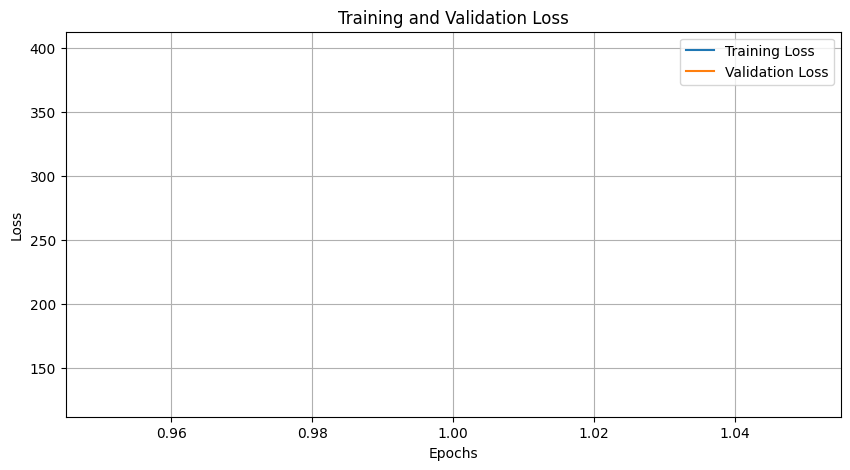

Epoch 2 - Training: 100%|██████████| 468/468 [01:21<00:00,  5.71it/s, loss=52.3]


Epoch 2 - Average Training Loss: 108.0604


Epoch 2 - Validation: 100%|██████████| 34/34 [00:02<00:00, 15.01it/s, loss=265]


Epoch 2 - Average Validation Loss: 451.4720


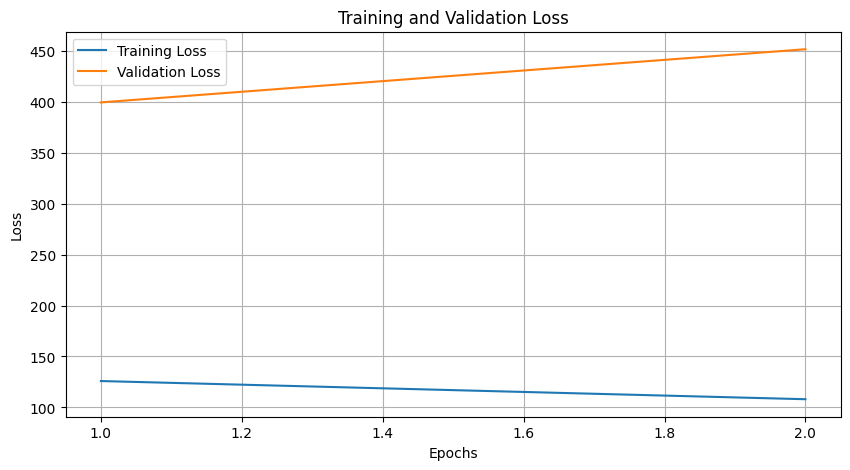

Epoch 3 - Training: 100%|██████████| 468/468 [01:21<00:00,  5.76it/s, loss=49.6]


Epoch 3 - Average Training Loss: 89.4422


Epoch 3 - Validation: 100%|██████████| 34/34 [00:02<00:00, 14.72it/s, loss=254]


Epoch 3 - Average Validation Loss: 436.3545


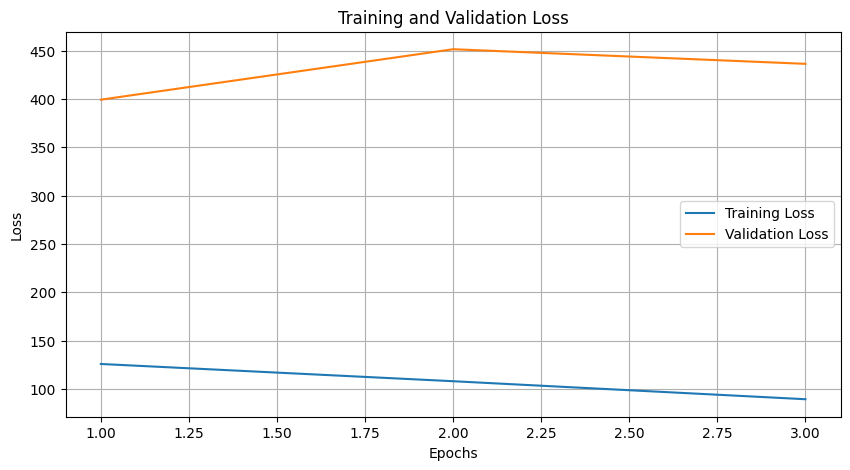

Epoch 4 - Training: 100%|██████████| 468/468 [01:21<00:00,  5.76it/s, loss=121]


Epoch 4 - Average Training Loss: 76.0669


Epoch 4 - Validation: 100%|██████████| 34/34 [00:02<00:00, 14.85it/s, loss=260]


Epoch 4 - Average Validation Loss: 481.4884


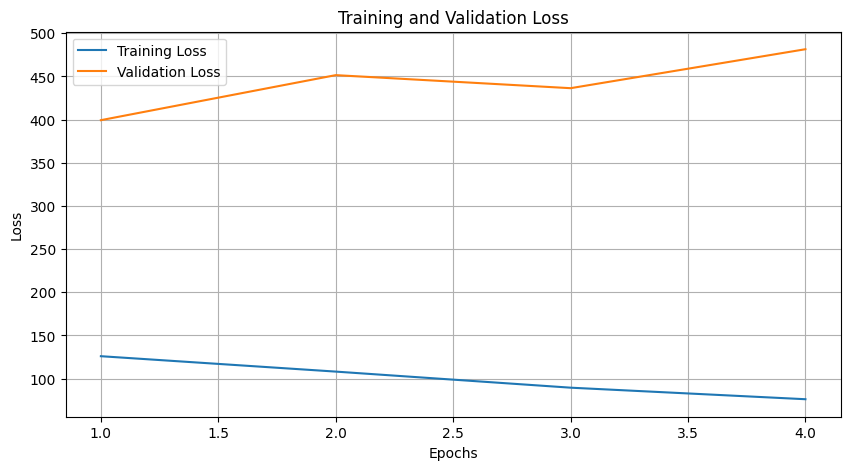

Epoch 5 - Training: 100%|██████████| 468/468 [01:21<00:00,  5.76it/s, loss=20.9]


Epoch 5 - Average Training Loss: 63.9092


Epoch 5 - Validation: 100%|██████████| 34/34 [00:02<00:00, 15.02it/s, loss=266]


Epoch 5 - Average Validation Loss: 501.9319


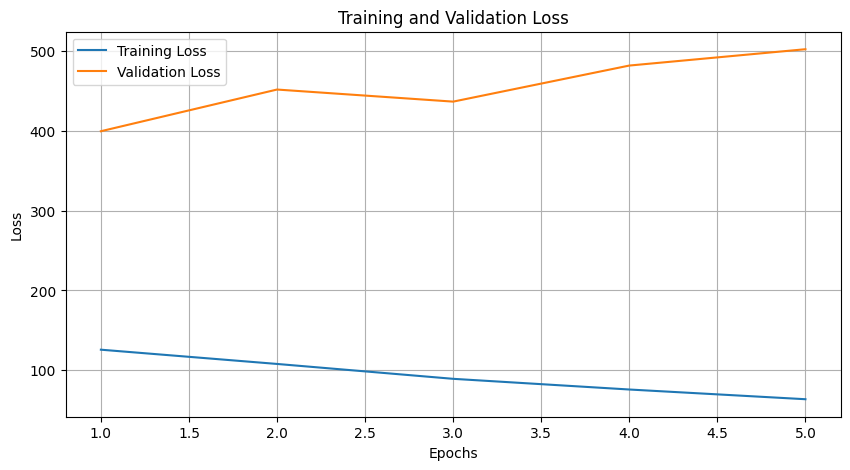

Epoch 6 - Training: 100%|██████████| 468/468 [01:21<00:00,  5.76it/s, loss=23.6]


Epoch 6 - Average Training Loss: 53.9925


Epoch 6 - Validation: 100%|██████████| 34/34 [00:02<00:00, 15.21it/s, loss=280]


Epoch 6 - Average Validation Loss: 509.9600


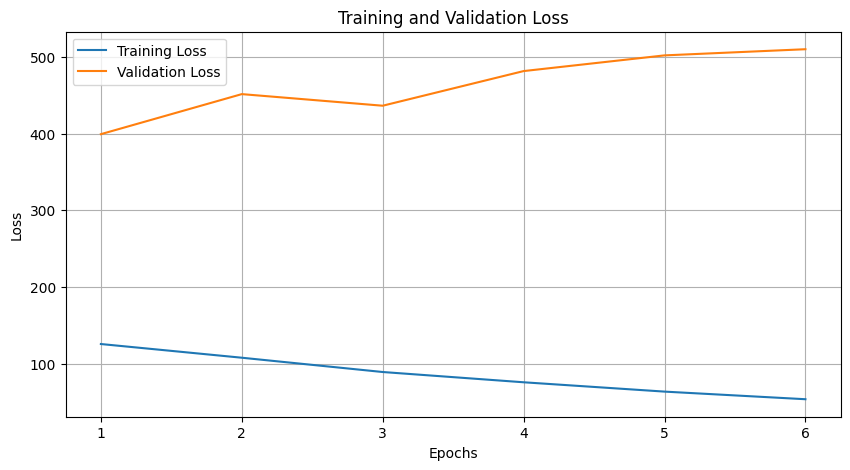

Epoch 7 - Training: 100%|██████████| 468/468 [01:21<00:00,  5.76it/s, loss=30.2]


Epoch 7 - Average Training Loss: 48.3648


Epoch 7 - Validation: 100%|██████████| 34/34 [00:02<00:00, 15.11it/s, loss=308]


Epoch 7 - Average Validation Loss: 532.3538


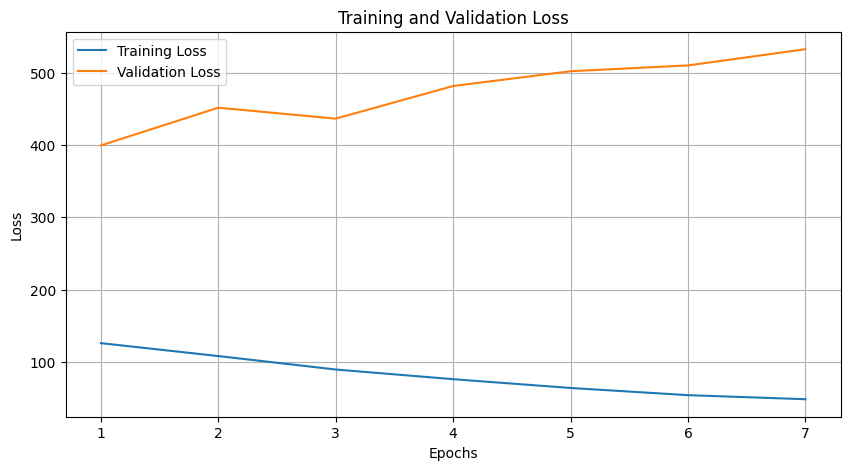

Epoch 8 - Training: 100%|██████████| 468/468 [01:21<00:00,  5.73it/s, loss=29.9]


Epoch 8 - Average Training Loss: 42.7742


Epoch 8 - Validation: 100%|██████████| 34/34 [00:02<00:00, 14.65it/s, loss=310]


Epoch 8 - Average Validation Loss: 536.4432


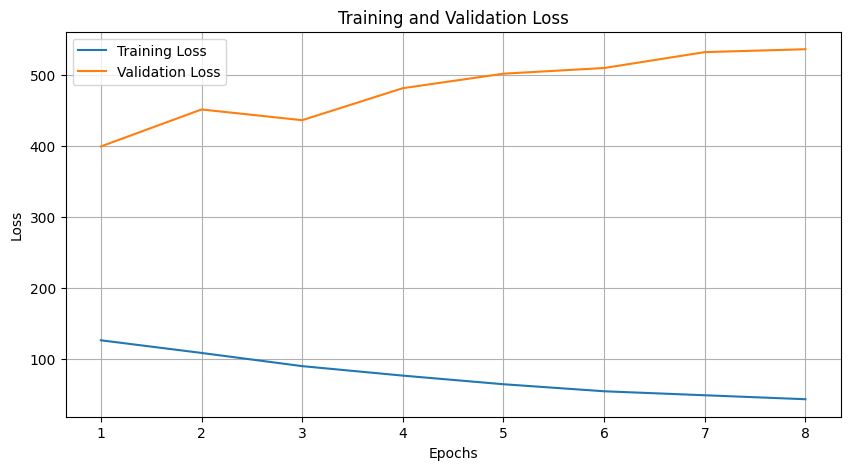

Epoch 9 - Training: 100%|██████████| 468/468 [01:21<00:00,  5.74it/s, loss=13.8]


Epoch 9 - Average Training Loss: 39.4442


Epoch 9 - Validation: 100%|██████████| 34/34 [00:02<00:00, 14.90it/s, loss=277]


Epoch 9 - Average Validation Loss: 554.0347


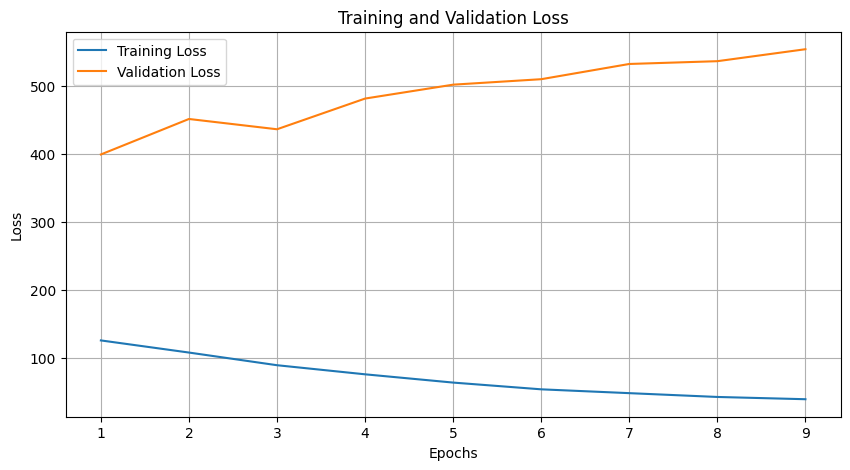

Epoch 10 - Training: 100%|██████████| 468/468 [01:21<00:00,  5.74it/s, loss=14.3]


Epoch 10 - Average Training Loss: 32.5174


Epoch 10 - Validation: 100%|██████████| 34/34 [00:02<00:00, 14.94it/s, loss=321]


Epoch 10 - Average Validation Loss: 568.7645


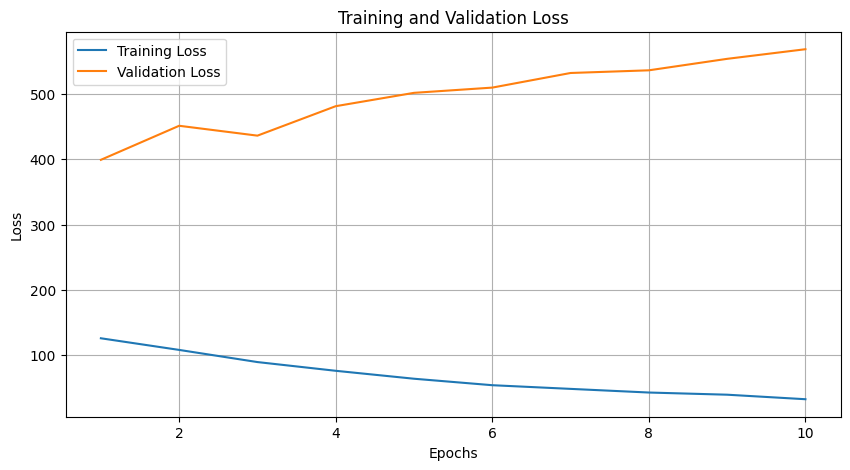

In [26]:
import matplotlib.pyplot as plt
from tqdm import tqdm

# Initialize lists to store loss values
train_losses = []
val_losses = []

# Training loop with progress bar and loss plotting
epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for epoch in range(epochs):
    # Set model to training mode
    model.train()
    total_train_loss = 0

    # Use tqdm for progress bar
    train_progress = tqdm(train_loader, desc=f"Epoch {epoch + 1} - Training")
    for batch in train_progress:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        loss = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)

        # Backward pass and optimizer step
        loss.backward()
        optimizer.step()

        # Accumulate loss and update progress bar
        total_train_loss += loss.item()
        train_progress.set_postfix(loss=loss.item())

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f"Epoch {epoch + 1} - Average Training Loss: {avg_train_loss:.4f}")

    # Validation step
    model.eval()
    total_val_loss = 0

    val_progress = tqdm(val_loader, desc=f"Epoch {epoch + 1} - Validation")
    with torch.no_grad():
        for batch in val_progress:
            input_ids, attention_mask, labels = [x.to(device) for x in batch]

            # Forward pass
            loss = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)

            # Accumulate loss
            total_val_loss += loss.item()
            val_progress.set_postfix(loss=loss.item())

    avg_val_loss = total_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    print(f"Epoch {epoch + 1} - Average Validation Loss: {avg_val_loss:.4f}")

    # Plot loss after every epoch
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, epoch + 2), train_losses, label="Training Loss")
    plt.plot(range(1, epoch + 2), val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()
    plt.grid()
    plt.show()


In [27]:
# Training loop
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
# Check if labels contain out-of-range values
print(f"Max label: {labels_train.max()}, Num labels: {len(label_to_id)}")


Max label: 15, Num labels: 16


In [28]:
def predict_on_test(model, test_loader, device):
    model.eval()
    predictions = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = [x.to(device) for x in batch]
            preds = model(input_ids=input_ids, attention_mask=attention_mask)
            predictions.extend(preds)

    return predictions


In [29]:
from torch.utils.data import DataLoader

test_dataset = TensorDataset(input_ids_test, attention_masks_test, labels_test)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

predictions = predict_on_test(model, test_loader, device)


In [30]:
def decode_predictions(predictions, input_ids, tokenizer, id_to_label):
    decoded_results = []
    for pred_seq, input_seq in zip(predictions, input_ids):
        tokens = tokenizer.convert_ids_to_tokens(input_seq)
        labels = [id_to_label.get(label_id, "UNK") for label_id in pred_seq]
        decoded_results.append(list(zip(tokens, labels)))
    return decoded_results

decoded_results = decode_predictions(predictions, input_ids_test.tolist(), tokenizer, id_to_label)


In [38]:
decoded_results

[[('[CLS]', 'PAD'),
  ('これ', '代名詞'),
  ('##に', '助詞'),
  ('不', '接頭辞'),
  ('快', '名詞'),
  ('感', '助詞'),
  ('を', '動詞'),
  ('示', '名詞'),
  ('す', '動詞'),
  ('住', '助動詞'),
  ('民', '助動詞'),
  ('はい', '助詞'),
  ('##まし', '記号'),
  ('##た', '名詞'),
  ('##が', '名詞'),
  (',', '名詞'),
  ('現', '助詞'),
  ('在', '名詞'),
  (',', '助詞'),
  ('表', '名詞'),
  ('立', '名詞'),
  ('って', '助詞'),
  ('反', '動詞'),
  ('対', '助詞'),
  ('や', '動詞'),
  ('抗', '名詞'),
  ('議', '助詞'),
  ('の', '動詞'),
  ('声', '助動詞'),
  ('を', '形状詞'),
  ('挙', '助動詞'),
  ('げ', '助動詞'),
  ('##てい', '補助記号'),
  ('##る', 'PAD'),
  ('住', 'PAD'),
  ('民', 'PAD'),
  ('はい', 'PAD'),
  ('##ない', 'PAD'),
  ('##よう', 'PAD'),
  ('##で', 'PAD'),
  ('##す', 'PAD'),
  ('。', 'PAD'),
  ('[SEP]', 'PAD')],
 [('[CLS]', 'PAD'),
  ('幸', '名詞'),
  ('福', '助詞'),
  ('の', '名詞'),
  ('科', '名詞'),
  ('学', '助詞'),
  ('側', '助詞'),
  ('から', '記号'),
  ('##は', '副詞'),
  (',', '副詞'),
  ('特', '動詞'),
  ('に', '助詞'),
  ('##どう', '形容詞'),
  ('##して', '動詞'),
  ('##ほ', '名詞'),
  ('##しい', '名詞'),
  ('##と', '助詞'),
  ('##いう', '動詞'),
  

In [32]:
def calculate_accuracy(predictions, true_labels, id_to_label):
    total = 0
    correct = 0

    for preds, labels in zip(predictions, true_labels):
        for pred, label in zip(preds, labels):
            if id_to_label[label] != "PAD":
                total += 1
                if pred == label:
                    correct += 1

    accuracy = correct / total if total > 0 else 0
    return accuracy

# Convert true labels to list
true_labels = labels_test.tolist()

# Calculate accuracy
accuracy = calculate_accuracy(predictions, true_labels, id_to_label)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 59.16%
